In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(filename)
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pd.set_option('display.max_columns', 500)

dfs = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename != 'ca-dealers-used.csv':
            df = pd.read_csv(os.path.join(dirname, filename), nrows=200)
            display(df.head(3))
            display(df.columns)
            dfs.append(df)
            

1. vin
2. year
3. make
4. model
5. state
6. miles traveled
7. fuel type
**8. price**

In [4]:

df1 = dfs[0]
df1 = df1[['vin', 'year', 'make_name', 'model_name', 'city', 'mileage', 'fuel_type', 'price']]
df1.columns = ['vin', 'year', 'make', 'model', 'city', 'mileage', 'fuel', 'price']

df2 = dfs[1]
df2 = df2[['vin', 'year', 'make', 'model', 'city', 'miles', 'fuel_type', 'price']]
df2.columns = ['vin', 'year', 'make', 'model', 'city', 'mileage', 'fuel', 'price']

df3 = dfs[2]
df3 = df3[['VIN', 'year', 'manufacturer', 'model', 'region', 'odometer', 'fuel', 'price']]
df3.columns = ['vin', 'year', 'make', 'model', 'city', 'mileage', 'fuel', 'price']

frames=[df1,df2,df3]
df = pd.concat(frames)
display(df)

IndexError: list index out of range

In [73]:
cities = sorted(list(df.city.unique()))

In [74]:
df.price.value_counts()

0.0        10
32195.0    10
33990.0     6
27990.0     6
26990.0     6
           ..
32924.0     1
62185.0     1
18800.0     1
16439.0     1
16988.0     1
Name: price, Length: 408, dtype: int64

(array([312., 109.,  60.,  27.,  26.,  23.,   2.,   2.,   0.,   1.]),
 array([     0. ,  37045.7,  74091.4, 111137.1, 148182.8, 185228.5,
        222274.2, 259319.9, 296365.6, 333411.3, 370457. ]),
 <BarContainer object of 10 artists>)

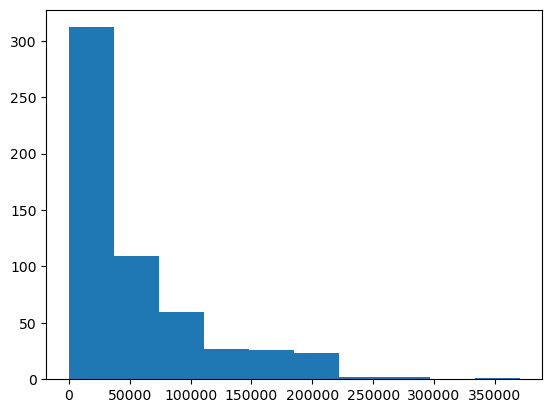

In [75]:
plt.hist(df.mileage)

In [76]:
df = df.dropna()

In [ ]:
df.make.unique()

In [ ]:
df['make'] = df['make'].apply(lambda x : x.lower().replace(' ', '_').replace('-', '_'))
df.make.unique()

In [ ]:
df.fuel.unique()

In [ ]:
gasoline = {'gas', 
            'E85 / Unleaded',
       'Unleaded', 'Premium Unleaded',
       'Premium Unleaded; Unleaded', 
       'Unleaded; Unleaded / E85', 'Unleaded / E85',
       'E85 / Unleaded; Unleaded', 'Premium Unleaded / Unleaded',
       'E85 / Premium Unleaded; E85 / Unleaded', 
       'E85', 'E85 / Premium Unleaded', 
       'Compressed Natural Gas; Unleaded',
       'E85 / Unleaded; Unleaded / Unleaded',
       'Diesel / Premium Unleaded', 'E85 / Unleaded; Unleaded / E85',
       'Unleaded / Unleaded', 
       'Compressed Natural Gas / Unleaded', 'Diesel; Unleaded',
       'Diesel; E85 / Unleaded', 'E85 / Unleaded; Premium Unleaded',
       'Premium Unleaded; Premium Unleaded / E85', 'E85; E85 / Unleaded',
       'Unleaded / Premium Unleaded',
       'Premium Unleaded / E85',
       'M85 / Unleaded'
}

diesel = {
    'Biodiesel'
}

hybrid = {
       'Electric / Premium Unleaded', 
       'Electric / Unleaded',
       'Unleaded / Electric',
       'Electric / Hydrogen',
       'Electric / Premium Unleaded; Electric / Unleaded',
       'Electric / Premium Unleaded; Premium Unleaded',
       'Electric / E85'
}

other = {
    'Hydrogen', 
    'Premium Unleaded / Natural Gas',
    'Compressed Natural Gas / Lpg', 
    'Compressed Natural Gas', 'Propane',
    'Flex Fuel Vehicle',
}

In [ ]:
def fuel_preprocess(x):
    if x in gasoline:
        return 'gasoline'
    if x in diesel:
        return 'diesel'
    if x in hybrid:
        return 'hybrid'
    if x in other:
        return 'other'
    return x

In [ ]:
df['fuel'] = df['fuel'].apply(fuel_preprocess)
df['fuel'] = df['fuel'].apply(lambda x : x.lower())

In [ ]:
df.fuel.unique()

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['year', 'mileage']], df['price'], test_size=0.2, random_state=42)

In [81]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
clf.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.03125

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score


dtr = DecisionTreeRegressor(max_depth=20, min_samples_leaf=35).fit(X_train, y_train)

dtr.score(X_test, y_test)

In [ ]:
y_pred = dtr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(max_error(y_test, y_pred))
print(r2_score(y_test, y_pred))